# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

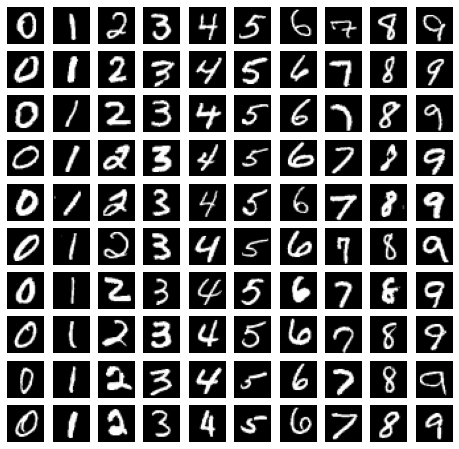

In [3]:
#def P1(num_examples=10):

### STUDENT START ###
import math

plt.rc('image', cmap='gray')
digits = np.unique(Y)
sh = X.shape[1]

fig, axs = plt.subplots(10, 10, figsize=(8,8))
# fig.rc
for i,j in enumerate(digits):
    for n in range(10):
        axs[n,i].imshow(X[Y==j][n].reshape((28,28)))
        axs[n,i].axis('off')
plt.show()
### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
#def P2(k_values):

### STUDENT START ###
kmod = [1,3,5,7,9]
klabels = ['0','1','2','3','4','5','6','7','8','9']

for k in kmod:

    kn = KNeighborsClassifier(n_neighbors = k)
    kn.fit(mini_train_data, mini_train_labels)
    pred = kn.predict(dev_data)
    print(str(k)+'-Nearest-Neighbor Score on Dev Set:')
    print(kn.score(dev_data, dev_labels))
    if k == 1:
        print(str(k)+'-Nearest-Neighbor Model Report:')
        c_r = classification_report(dev_labels, pred, labels = klabels)
        print(c_r)

        
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

1-Nearest-Neighbor Score on Dev Set:
0.884
1-Nearest-Neighbor Model Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

3-Nearest-Neighbor Score on Dev Set:
0.876
5-Nearest-Neighbor Score on Dev Set:
0.882
7-Nearest-Neighbor Score on Dev Set:
0.877
9-Nearest-Neighbor Score on Dev Set:

ANSWER:

The most difficult digit for 1-Nearest-Neighbors to identify is 9 - it has the lowest precision and f1-score out of all the digits, and its recall is only a little higher than the worst recall scores.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

1-Nearest-Neighbor Score with Training Training Set Size of 100:
	0.7
Time Needed to Measure Model Performance with Training Training Set Size of 100:
	0.28148484230041504 seconds
1-Nearest-Neighbor Score with Training Training Set Size of 200:
	0.799
Time Needed to Measure Model Performance with Training Training Set Size of 200:
	1.0050089359283447 seconds
1-Nearest-Neighbor Score with Training Training Set Size of 400:
	0.853
Time Needed to Measure Model Performance with Training Training Set Size of 400:
	1.1213672161102295 seconds
1-Nearest-Neighbor Score with Training Training Set Size of 800:
	0.856
Time Needed to Measure Model Performance with Training Training Set Size of 800:
	1.5285797119140625 seconds
1-Nearest-Neighbor Score with Training Training Set Size of 1600:
	0.902
Time Needed to Measure Model Performance with Training Training Set Size of 1600:
	3.189358711242676 seconds
1-Nearest-Neighbor Score with Training Training Set Size of 3200:
	0.919
Time Needed to Measure

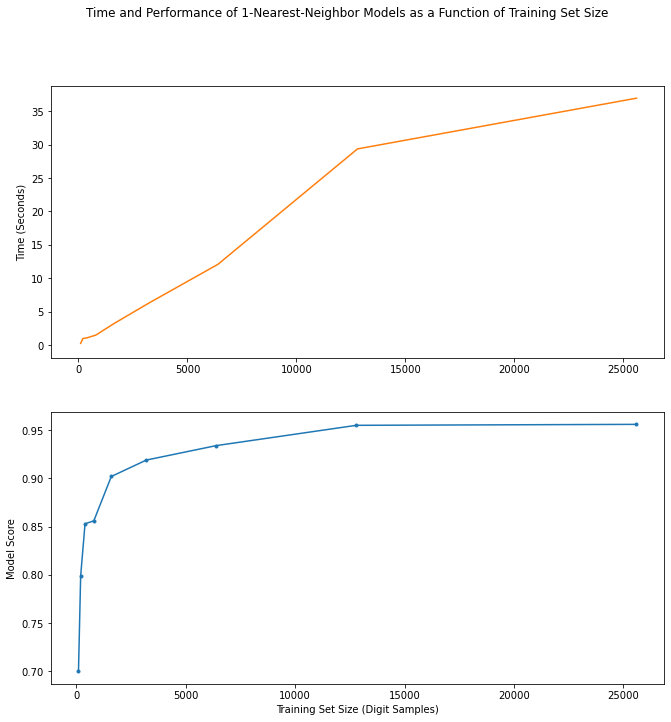

In [5]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
# datasets = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,250,300,350,400,450,500,520,540,560,580,600,620,640,660,680,700,750,800,850,900,950,1000,1500,2000,3000,4000,6000,8000,10000,30000,60000]
# datasets = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,250,300,350,400,450,500,520,540,560,580,600,620,640,660,680,700,750,800,850,900,950,1000,1500,3000,4000,6000,10000]
datasets = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
# datasets = [10,20,50,100,200,400,600,1000, 2000, 4000, 10000, 30000]
# datasets = [10,20,50,100,200,400]

timecount = []
scorecount = []
for d in datasets:
    getsample = np.random.randint(59999, size=d)
#     print(getsample.shape)
    sampleX = train_data[getsample]
    sampleY = train_labels[getsample]
    
    kn = KNeighborsClassifier(n_neighbors = 1)
    kn.fit(sampleX, sampleY)
    pred = kn.predict(dev_data)
    print('1-Nearest-Neighbor Score with Training Training Set Size of '+ str(d) +':')
    start = time.time()
    modelscore = kn.score(dev_data, dev_labels)
    print('\t'+str(modelscore))
    end = time.time()
    count = end-start
    print('Time Needed to Measure Model Performance with Training Training Set Size of '+ str(d) +':')
    print('\t'+str(count)+' seconds')
    timecount.append(count)
    scorecount.append(modelscore)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,11))
fig.suptitle('Time and Performance of 1-Nearest-Neighbor Models as a Function of Training Set Size')

ax1.plot(datasets, timecount, 'C1', 'o-')
ax1.set_yticks(range(0, math.ceil(max(timecount))+2,5))
ax1.set_yticklabels(range(0, math.ceil(max(timecount))+2,5))
ax1.set_ylabel('Time (Seconds)')

ax2.plot(datasets, scorecount, '.-')
ax2.set_xlabel('Training Set Size (Digit Samples)')
ax2.set_ylabel('Model Score')

plt.show()
### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

R-squared score of the linear regression model:
	0.39581127818841255
Predicted accuracy for training set size 60000:
	1.210699140313873
Predicted accuracy for training set size 120000:
	1.5816083973592634
Predicted accuracy for training set size 1000000:
	7.02161083402499


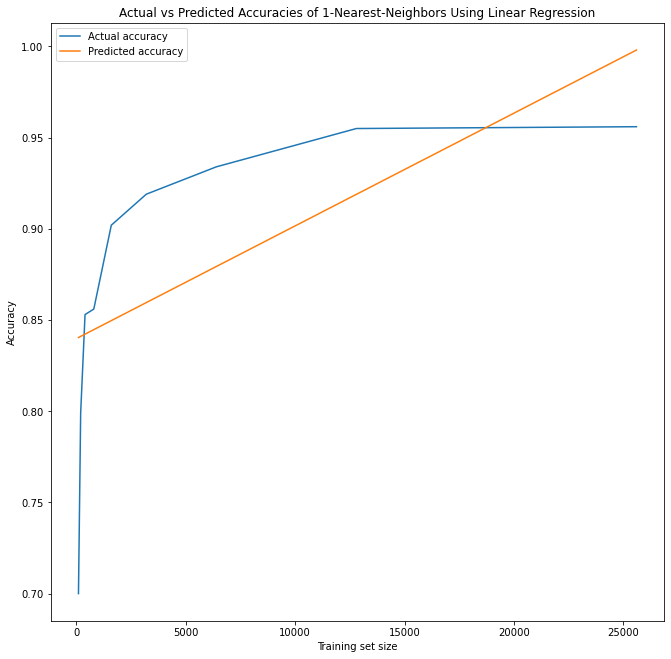

The issue with using regression is that the relationship 
between training set size and accuracy is not linear.  The more 
relationship appears to be more logarithmic in nature, and while 
regression can be manipulated to fit the line better, it may not 
accurately capture the reality of the data.




R-squared score of new linear regression model after applying log function to data:
	0.8719130045585751
Predicted accuracy for training set size 60000 (new model):
	1.0245202504152462
Predicted accuracy for training set size 120000 (new model):
	1.053136917081913
Predicted accuracy for training set size 1000000 (new model):
	1.140672258150329


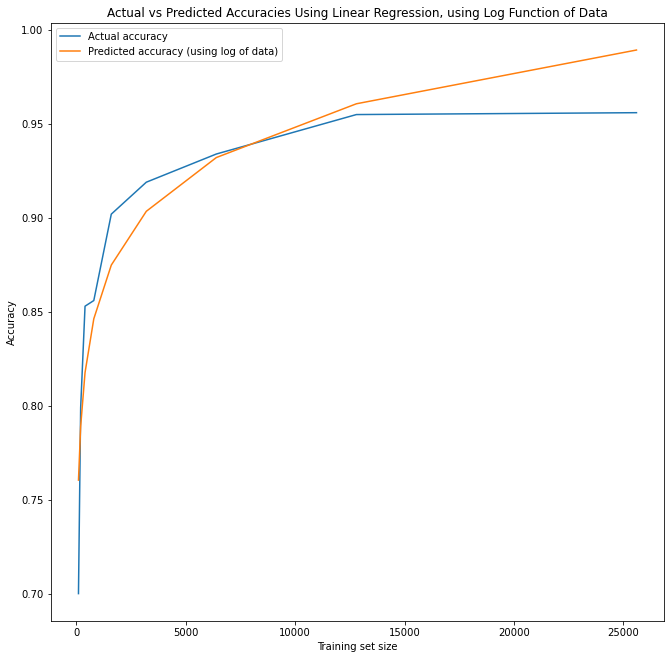

In [6]:
#def P4():

### STUDENT START ###
lr_X = np.array(datasets).reshape(-1,1)
lr_Y = scorecount

lr_model = LinearRegression()
lr_model.fit(lr_X, lr_Y)
lr_score = lr_model.score(lr_X, lr_Y)

predmodelscore = lr_model.predict(lr_X)
x_list = [60000, 120000, 1000000]
x_list = np.array([60000, 120000, 1000000]).reshape(-1,1)
pred_list = lr_model.predict(x_list)

print("R-squared score of the linear regression model:")
print("\t"+str(lr_score))

print("Predicted accuracy for training set size 60000:")
print("\t"+str(pred_list[0]))

print("Predicted accuracy for training set size 120000:")
print("\t"+str(pred_list[1]))

print("Predicted accuracy for training set size 1000000:")
print("\t"+str(pred_list[2]))

# lr_predY = lr_model.predict(lr_X)

# from sklearn.metrics import r2_score
# lr_score - r2_score(lr_Y, lr_predY)


fig, ax = plt.subplots(figsize=(11,11))
ax.plot(datasets, scorecount, label='Actual accuracy')
ax.plot(datasets, predmodelscore, label='Predicted accuracy')
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.set_title('Actual vs Predicted Accuracies of 1-Nearest-Neighbors Using Linear Regression')
plt.legend()

plt.show()

print('The issue with using regression is that the relationship \n'
    'between training set size and accuracy is not linear.  The more \n'
    'relationship appears to be more logarithmic in nature, and while \n'
    'regression can be manipulated to fit the line better, it may not \n'
    'accurately capture the reality of the data.')


def adddata(X,Y,n):
#     newX = np.empty(1000,dtype='object')
#     newY = np.empty(1000,dtype='object')

#     for i in range(1000):
#         c = np.random.randint(0, X.shape[0])
#         newX[i]=X[c]
#         newY[i]=Y[c]
    if n==0:
        return X,Y
    newX = np.repeat(X[25:], n, axis=0)
    newY = np.tile(Y[25:], n)
#     newX = np.concatenate(X,)
#     newY = np.concatenate(Y,)
    return newX,newY

    
log_lr_Y = np.log(lr_Y)
log_lr_X = np.log(lr_X)

newX,newY = log_lr_X, lr_Y


newlr_model = LinearRegression()
newlr_model.fit(newX, newY)
newlr_score = newlr_model.score(newX, newY)

newpredmodelscore = newlr_model.predict(log_lr_X)
x_list = [60000, 120000, 1000000]
x_list = np.log(np.array([60000, 120000, 1000000]).reshape(-1,1))
newpred_list = newlr_model.predict(x_list)


print("")
print("")
print("")
print("")

print("R-squared score of new linear regression model after applying log function to data:")
print("\t"+str(newlr_score))

print("Predicted accuracy for training set size 60000 (new model):")
print("\t"+str(newpred_list[0]))

print("Predicted accuracy for training set size 120000 (new model):")
print("\t"+str(newpred_list[1]))

print("Predicted accuracy for training set size 1000000 (new model):")
print("\t"+str(newpred_list[2]))


fig, ax = plt.subplots(figsize=(11,11))
ax.plot(datasets, scorecount, label='Actual accuracy')
ax.plot(datasets, newpredmodelscore, label='Predicted accuracy (using log of data)')
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.set_title('Actual vs Predicted Accuracies Using Linear Regression, using Log Function of Data')
plt.legend()
plt.show()

### STUDENT END ###

#P4()

ANSWER: The issue with using regression is that the relationship between training set size and accuracy is not linear.  The relationship appears to be more logarithmic in nature, so to compensate, we can apply a logarithmic transformation to the training data to obtain a more linear relationship between the training and test data.  This results in a much better R squared score, and the predicted accuracies are bounded closer to 1.  Another problem is that due to the time constraints of the nearest-neighbor model, it is impractical to obtain data for higher training set sizes, which impacts the ability of the linear regression model to learn accuracy values for the higher training set sizes.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Performance of 1-Nearest-Neighbor model on dev set after training on mini set:
0.884


1-Nearest-Neighbor Confusion Matrix
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


Predicted    0    1   2   3   4   5    6    7   8    9   All
Actual                                                      
0          101    0   1   0   0   0    1    1   2    0   106
1            0  116   1   0   0   0    0    0   1    0   118
2            1    4  84   2   2   0    2    4   6    1   106
3            0    2   0  84   0   6    0    2   3    0    97
4            0    0   1   0  78   0    0    2   0   11    92
5            2   

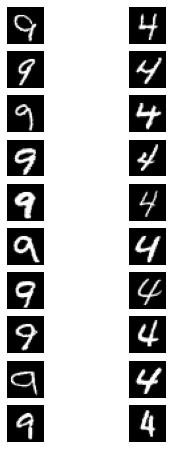

In [7]:
#def P5():

### STUDENT START ###
#def P3(train_sizes, accuracies):

### STUDENT START ###


kn = KNeighborsClassifier(n_neighbors = 1)
kn.fit(mini_train_data, mini_train_labels)
pred = kn.predict(dev_data)
# start = time.time()
modelscore = kn.score(dev_data, dev_labels)
print('Performance of 1-Nearest-Neighbor model on dev set after training on mini set:')
print(modelscore)

print("")
print("")
print('1-Nearest-Neighbor Confusion Matrix')

print(confusion_matrix(dev_labels, pred, labels=klabels))
# print(confusion_matrix(dev_labels, pred))
print("")
print("")

import pandas as pd
y_actu = pd.Series(dev_labels, name ='Actual')
y_pred = pd.Series(pred, name = 'Predicted')
# df_confusion = pd.crosstab(y_actu, y_pred)

df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print(df_confusion)


plt.rc('image', cmap='gray')
confuseddigits = ['4','9']
#digits = np.unique(Y)
sh = X.shape[1]

fig, axs = plt.subplots(10, 2, figsize=(4,8))
# fig.rc
# for i,j in enumerate(digits):
for n in range(10):
#     print(n)
    axs[n,1].imshow(X[Y=='4'][n].reshape((28,28)))
    axs[n,1].axis('off')
    axs[n,0].imshow(X[Y=='9'][n].reshape((28,28)))
    axs[n,0].axis('off')

### STUDENT END ###

#P5()

ANSWER: It confuses 4 and 9 the most often (14 false negatives/positives).

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

Example of unfiltered digits:


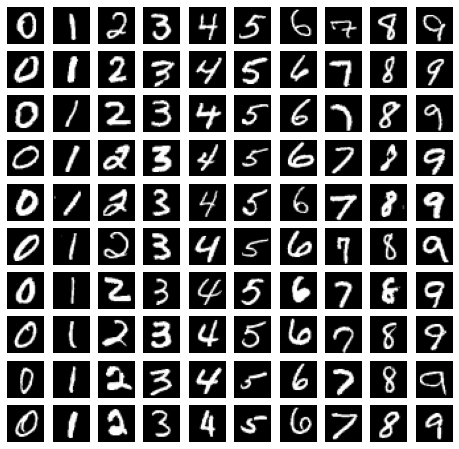


Example of Unfiltered 4:


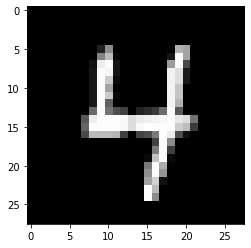

Example of filtered digits:


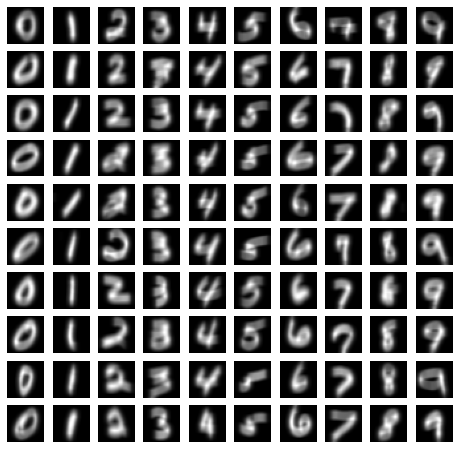


Example of Filtered 4:


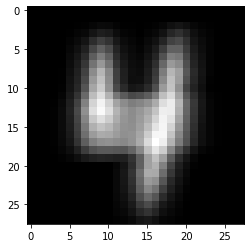


Performance using no filter:
0.884


/Users/asht/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance using filtered training data and unfiltered dev data:
0.147
Performance using unfiltered training data and filtered dev data:
0.281
Performance using filtered training and filtered dev data:
0.871


In [8]:
#def P6():
    
### STUDENT START ###
from scipy.ndimage import uniform_filter
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter
weight= [1,1,3,6,6,3,1,1]

w = np.array([weight,weight,weight,weight,weight,weight,weight])
# w = np.array([[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],
#                   [1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1]])
# w = np.array([[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],
#                   [1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1],[1,1.5,2,3,3,2,1.5,1]])
# w = np.array([[0.5,0.7,1,3,3,1,0.7,0.5],[0.5,0.7,1,3,3,1,0.7,0.5],[0.5,0.7,1,3,3,1,0.7,0.5],[0.5,0.7,1,3,3,1,0.7,0.5],
#               [0.5,0.7,1,3,3,1,0.7,0.5],[0.5,0.7,1,3,3,1,0.7,0.5],[0.5,0.7,1,3,3,1,0.7,0.5],[0.5,0.7,1,3,3,1,0.7,0.5]])
# w = np.array([[0.5,1,3,6,6,3,1,0.5],[0.5,1,3,6,6,3,1,0.5],[0.5,1,3,6,6,3,1,0.5],[0.5,1,3,6,6,3,1,0.5],
#              [0.5,1,3,6,6,3,1,0.5],[0.5,1,3,6,6,3,1,0.5],[0.5,1,3,6,6,3,1,0.5],[0.5,1,3,6,6,3,1,0.5],])
# w = np.array([[2,2,8,16,16,8,2,2],[2,2,8,16,16,8,2,2],[2,2,8,16,16,8,2,2],[2,2,8,16,16,8,2,2],
#               [2,2,8,16,16,8,2,2],[2,2,8,16,16,8,2,2],[2,2,8,16,16,8,2,2],[2,2,8,16,16,8,2,2]])
              
              
def filtration(data):
    filtered = np.empty(mini_train_data.shape)
    for i in range(filtered.shape[0]):
        filtered[i] = convolve(input = data[i].reshape((28,28)), weights = w).reshape(784)
    return filtered
    

filtered_train = filtration(np.copy(mini_train_data))
filtered_dev = filtration(np.copy(dev_data))


print('Example of unfiltered digits:')
plt.rc('image', cmap='gray')
digits = np.unique(Y)
sh = mini_train_data.shape[1]

fig, axs = plt.subplots(10, 10, figsize=(8,8))
# fig.rc
for i,j in enumerate(digits):
    for n in range(10):

        axs[n,i].imshow(mini_train_data[mini_train_labels==j][n].reshape((28,28)))
        axs[n,i].axis('off')
plt.show()

print()
print('Example of Unfiltered 4:')
plt.imshow(mini_train_data[mini_train_labels=='4'][0].reshape((28,28)))
plt.show()

print('Example of filtered digits:')
plt.rc('image', cmap='gray')
digits = np.unique(Y)
sh = filtered_train.shape[1]

fig, axs = plt.subplots(10, 10, figsize=(8,8))
# fig.rc
for i,j in enumerate(digits):
    for n in range(10):

        axs[n,i].imshow(filtered_train[mini_train_labels==j][n].reshape((28,28)))
        axs[n,i].axis('off')
plt.show()        

print()
print('Example of Filtered 4:')
plt.imshow(filtered_train[mini_train_labels=='4'][0].reshape((28,28)))
plt.show()
print()

#no filter

kn = KNeighborsClassifier(n_neighbors = 1)
kn.fit(mini_train_data, mini_train_labels)
modelscore = kn.score(dev_data, dev_labels)
modelreport = classification_report(kn.predict(dev_data), dev_labels, labels=klabels)
print('Performance using no filter:')
print(modelscore)
# print(modelreport)

#filter training data but not dev data

kn = KNeighborsClassifier(n_neighbors = 1)
kn.fit(filtered_train, mini_train_labels)
modelscore = kn.score(dev_data, dev_labels)
modelreport = classification_report(kn.predict(dev_data), dev_labels, labels=klabels)

print('Performance using filtered training data and unfiltered dev data:')
print(modelscore)
# print(modelreport)


#filter dev data but not training data

kn = KNeighborsClassifier(n_neighbors = 1)
kn.fit(mini_train_data, mini_train_labels)
modelscore = kn.score(filtered_dev, dev_labels)
modelreport = classification_report(kn.predict(filtered_dev), dev_labels, labels=klabels)

print('Performance using unfiltered training data and filtered dev data:')
print(modelscore)
# print(modelreport)

#filter training data and dev data

kn = KNeighborsClassifier(n_neighbors = 1)
kn.fit(filtered_train, mini_train_labels)
modelscore = kn.score(filtered_dev, dev_labels)
modelreport = classification_report(kn.predict(filtered_dev), dev_labels, labels=klabels)

print('Performance using filtered training and filtered dev data:')
print(modelscore)
# print(modelreport)


### STUDENT END ###

#P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

Bernoulli model score:
0.827

Example of Regular 4:


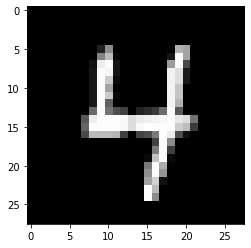


Example of White/Grey/Black 4:


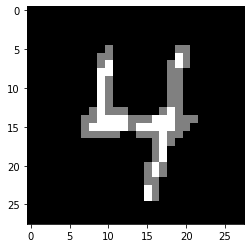


Multinomial model score:
0.821


In [9]:
#def P7():

### STUDENT START ###

# bin_NB = BernoulliNB(binarize=0.5)

max_accuracy = 0
best_binarize = 0
for i in np.arange(0,1,0.05):
    bin_NB = BernoulliNB(binarize=i)

    bin_NB.fit(mini_train_data,mini_train_labels)
    bin_probs = bin_NB.predict_proba(dev_data)
    bin_score = bin_NB.score(dev_data, dev_labels)
    
    if bin_score>max_accuracy:
        max_accuracy = bin_score
        best_binarize = i
#         print(i)
#         print(bin_score)
    
bin_NB = BernoulliNB(binarize=best_binarize)
bin_NB.fit(mini_train_data,mini_train_labels)
bin_probs = bin_NB.predict_proba(dev_data)

def mapping_categorical(probs):
    cat = []
    for i in range(probs.shape[0]):
        a = probs[i].tolist().index(max(probs[i]))
        cat.append(str(a))
    return np.array(cat)

if (mapping_categorical(bin_probs) == bin_NB.predict(dev_data)).all()==True:
    print('Bernoulli model score:')
    print((dev_labels==mapping_categorical(bin_probs)).sum()/dev_labels.shape[0])

    
##  Multinomial  
    

def wbg(xdata,white,grey,black):
    datacopy = np.empty(xdata.shape)
    for i in range(xdata.shape[0]):   
        datacopy[i] = [(0 if n<white else (1 if n<grey else 2)) for n in xdata[i]]

    return datacopy


max_accuracy = 0
wval = 0.1
gval = 0.1
bval = 0.1

for i in np.arange(0,1,0.05):
    for j in np.arange(0,1,0.05):
        grey_train = wbg(mini_train_data,i, j, bval)
        grey_dev = wbg(dev_data,i, j,bval)


        mult_NB = MultinomialNB()
        mult_NB.fit(grey_train, mini_train_labels)
        mult_probs = mult_NB.predict_proba(grey_dev)

        mapped_mult = mapping_categorical(mult_probs)
        mult_score = mult_NB.score(grey_dev, dev_labels)
        if mult_score>max_accuracy:
            wval = i
            gval = j
            max_accuracy = mult_score
#             print(mult_NB.score(grey_dev, dev_labels))
#             print(wval)
#             print(gval)
grey_train = wbg(mini_train_data,wval, gval, bval)
grey_dev = wbg(dev_data,wval, gval,bval)

print()
print('Example of Regular 4:')
plt.imshow(mini_train_data[mini_train_labels=='4'][0].reshape((28,28)))
plt.show()

print()
print('Example of White/Grey/Black 4:')
plt.imshow(grey_train[mini_train_labels=='4'][0].reshape((28,28)))
plt.show()
print()

mult_NB = MultinomialNB()
mult_NB.fit(grey_train, mini_train_labels)
mult_probs = mult_NB.predict_proba(grey_dev)

mapped_mult = mapping_categorical(mult_probs)
if (mapped_mult == mult_NB.predict(grey_dev)).all() == True:
    print('Multinomial model score:')
    print((dev_labels==mapped_mult).sum()/dev_labels.shape[0])
#     print(mult_NB.score(grey_dev, dev_labels))
### STUDENT END ###

#P7()

ANSWER: At their best, the multinomial model performs slightly worse than the binomial model.  Allowing for the 'grey' value inbetween the white and black introduces uncertainty, while only using white and black retains only the most clear pixel information.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [10]:
#def P8(alphas):

### STUDENT START ###

bin_NB = BernoulliNB(alpha=i, binarize=best_binarize)

# bin_NB.fit(mini_train_data,mini_train_labels)
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# alphas = {'alpha': np.arange(0,1,0.00001).tolist(),
#          'binarize': np.arange(0,1,0.00001).tolist()}



clf = GridSearchCV(bin_NB, alphas)
clf.fit(mini_train_data, mini_train_labels)

# print(clf.get_params())
# print(clf.cv_results_)
# print()
print('Best estimator:')
print(clf.best_estimator_)
print()
print('Best score:')
print(clf.best_score_)
print()
print("Best alpha:")
print(0.0001)

pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

Best estimator:
BernoulliNB(alpha=0.0001, binarize=0.30000000000000004)

Best score:
0.825

Best alpha:
0.0001


,alpha,Accuracy
0,1.000000e-10,0.819
1,1.000000e-04,0.825
2,1.000000e-03,0.823
3,1.000000e-02,0.823
4,1.000000e-01,0.820
5,5.000000e-01,0.816
6,1.000000e+00,0.812
7,2.000000e+00,0.815
8,1.000000e+01,0.777


ANSWER: The accuracy is better when alpha is closer to 0 (peaking at about 1.0e-04), which makes a certain amount of sense - the higher the LaPlace smoothing, the higher the uncertainty of the model.  (As alpha increases, all probabilities begin to approach each other and the distribution approaches a uniform distribution.)

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

Score of GaussianNB model:  0.593


Example of Regular 4:


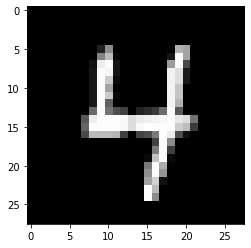


Example of Noisified 4:


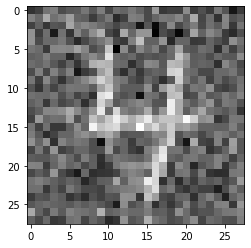


Score of GaussianNB model using transformation:  0.818


In [11]:
#def P9():

### STUDENT END ###
g_NB = GaussianNB() 
g_NB.fit(mini_train_data, mini_train_labels)
print("Score of GaussianNB model: ",g_NB.score(dev_data, dev_labels))
print()
# plt.figure(figsize=(10,10))
# plt.hist(g_NB.theta_)
# plt.title("Distribution of Theta of GaussianNB Model Using Original Data")
# plt.show()
# plt.hist(g_NB.sigma_)
# plt.show()
the = g_NB.theta_
sig = g_NB.sigma_


# transformation
def noisify(xdata):
    th = xdata.mean()
    si = xdata.std()
#     th = np.empty(xdata[0].shape)
#     si = np.empty(xdata[0].shape)
    noise = np.random.normal(th, si, xdata.shape)
    noisy_data = np.array(np.copy(xdata) + noise)
#     for i in range(len(xdata[0])):
#         th[i] = mini_train_data[:][i].mean()
#         si[i] = mini_train_data[:][i].std()
    return noisy_data

    
gauss_train = noisify(mini_train_data)
gauss_dev = noisify(dev_data)



print()
print('Example of Regular 4:')
plt.imshow(mini_train_data[mini_train_labels=='4'][0].reshape((28,28)))
plt.show()


print()
print('Example of Noisified 4:')
plt.imshow(gauss_train[mini_train_labels=='4'][0].reshape((28,28)))
plt.show()


g_NB = GaussianNB() 
g_NB.fit(gauss_train, mini_train_labels)

# print()
# plt.figure(figsize=(10,10))
# plt.hist(g_NB.theta_)
# plt.title("Distribution of Theta of GaussianNB Model Using Transformed Data")
# plt.show()
# plt.hist(g_NB.sigma_)
# plt.show()
print()
print("Score of GaussianNB model using transformation: ",g_NB.score(gauss_dev, dev_labels))
### STUDENT END ###

#P9()

ANSWER: The accuracy of Gaussian naive bayes is less than 0.6, which makes it a worse classifier than the Bernoulli naive bayes.  The Gaussian NB assumes that the distribution of the data is normal, but we don't actually know that the MNIST data is normally distributed.  However, we can transform the data into an approximately normal distribution by adding randomly generated noise, generated using the mean and standard deviation of the data.  (For MNIST data, there is a lot of blank (black) space, which heavily skews the value of the distribution we are actually looking for, which is the distribution of pixel values of the written numbers themselves.  By adding noise, we can reduce the skew so the data becomes more normalized around the distribution of the pixels of the number itself.)  Once we add noise to the train and dev sets, our Gaussian model's accuracy improves, approaching the score of the Bernoulli model.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

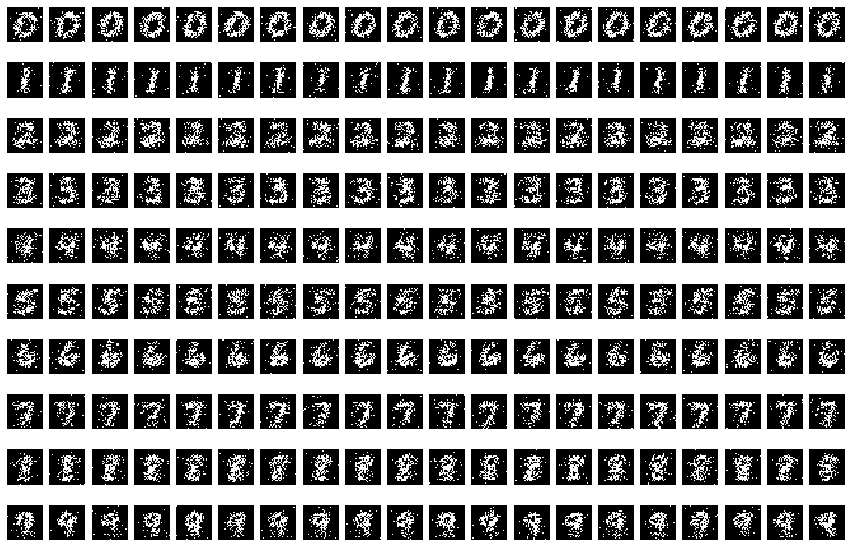

In [12]:
#def P10(num_examples):

### STUDENT START ###

bin_NB = BernoulliNB(binarize=best_binarize)
bin_NB.fit(mini_train_data,mini_train_labels)
bin_probs = bin_NB.predict_proba(dev_data)
feature_probs=np.exp(bin_NB.feature_log_prob_)
# bin_score = bin_NB.score(dev_data, dev_labels)
# print()
# print('Score when alpha is near 0: ', bin_score)

digitprobs = []
for i in range(len(klabels)):
    digitprobs.append(bin_probs[:,i])
    
gen_digits = np.random.rand(10,20, 784)

plt.rc('image', cmap='gray')
digits = np.unique(mini_train_labels)
#sh = X.shape[1]

fig, axs = plt.subplots(10, 20, figsize=(15,10))
vectorize_digit = np.vectorize(int)
for i in range(10):
    for j in range(20):
#         print(digits[i][j])
#         print(feature_probs[i])
        generate=vectorize_digit(gen_digits[i][j]<=feature_probs[i])
        axs[i,j].imshow(np.reshape(generate,(-1,28)), interpolation='nearest')   
        axs[i,j].axis('off')
plt.show()
### STUDENT END ###

#P10(20)

ANSWER:  The generated images are much fuzzier than the training data digits, but they are mostly recognizable.  Because we are binarizing the pixel values, there are no shades of grey, only white and black pixels.  Notably, the 9s are very indistinct, which is consistent with some previous answers.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [13]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
best_alpha = 0.0001
best_binarize = 0.3
bin_NB = BernoulliNB(binarize=best_binarize, alpha = best_alpha)

bin_NB.fit(mini_train_data,mini_train_labels)
bin_probs = bin_NB.predict_proba(dev_data)
bin_pred = bin_NB.predict(dev_data)
buckets = [0.0, 0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

for i, prediction in enumerate(bin_pred):
    bestprob = max(bin_probs[i])
    bucket_i = []
    for j in range(len(buckets)-1):
        bucket_i.append(bestprob>=buckets[j] and bestprob<=buckets[j+1])
        if bestprob>=buckets[j] and bestprob<=buckets[j+1]:
            bucket_i.append(True)
            total[j]=total[j]+1
            if prediction==dev_labels[i]:
                correct[j]= correct[j]+1

for i in range(len(buckets)-1):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (buckets[i], buckets[i+1], total[i], accuracy))            


# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))            
    
    
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.419
p(pred) is 0.9000000000000 to 0.9990000000000    total =  70    accuracy = 0.529
p(pred) is 0.9990000000000 to 0.9999900000000    total =  57    accuracy = 0.596
p(pred) is 0.9999900000000 to 0.9999999000000    total =  68    accuracy = 0.632
p(pred) is 0.9999999000000 to 0.9999999990000    total =  52    accuracy = 0.788
p(pred) is 0.9999999990000 to 0.9999999999900    total =  60    accuracy = 0.817
p(pred) is 0.9999999999900 to 0.9999999999999    total =  53    accuracy = 0.774
p(pred) is 0.9999999999999 to 1.0000000000000    total = 609    accuracy = 0.949


ANSWER:  The Naive Bayes is weakly calibrated, as there is a generally positive correlation between posterior probability and accuracy.  As the buckets shrink and approach 1, the accuracy increases as well, but the Naive Bayes is not srongly correlated because the prior and posterior probabilities are not exactly proportional.  (At a posterior probability of 0.9 to 0.999, the accuracy is only 0.529.)  Laplace smoothing value used was 0.0001.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [14]:
#def P12():

### STUDENT START ###

best_alpha = 0.0001
best_binarize = 0.3

# Baseline Bernoulli Naive Bayes Model Using Unenhanced Data
base_NB = BernoulliNB(binarize=best_binarize, alpha = best_alpha)
base_NB.fit(mini_train_data,mini_train_labels)
baseline_score = base_NB.score(dev_data, dev_labels)

# ~~~Enhancing Data Set~~~
# Method to sum over rows of an instance of training data
def row_sum(xdata):
    newdata = np.copy(xdata)
    rowsum = newdata.sum(axis = 1)
    return rowsum

# Method to sum over cols of an instance of training data
def col_sum(xdata):
    newdata = np.copy(xdata)
    colsum = newdata.sum(axis = 0)
    return colsum

# Method to average over rows of an instance of training data
def row_mean(xdata):
    newdata = np.copy(xdata)
    rowmean = np.mean(newdata, axis = 1)
    return rowmean

# Method to average over cols of an instance of training data
def col_mean(xdata):
    newdata = np.copy(xdata)
    colmean = np.mean(newdata, axis = 0)
    return colmean

# Method to add enhancements to data by applying the above methods
def apply_enhancement(xdata):

    # n = number of enhancements performed on the data
    n = 3
    # initializing array for enhanced data
    enhanced_data = np.zeros(shape = (xdata.shape[0],xdata.shape[1]+28*n))
    
    for i in range(xdata.shape[0]):
        
        digit = xdata[i].reshape(28,28)
        rowtotal = row_sum(digit)
        coltotal = col_sum(digit)
        rowmean = row_mean(digit)
        colmean = col_mean(digit)
        
        digit = digit.reshape(784)
#         digit = np.append(digit, rowtotal)
        digit = np.append(digit, coltotal)
        digit = np.append(digit, rowmean)
        digit = np.append(digit, colmean)
        enhanced_data[i] = digit
    return enhanced_data
    


# Initiating new datasets
new_mini_train_data = np.copy(mini_train_data)
new_dev_data = np.copy(dev_data)

# Adding new features to data
new_mini_train_data = apply_enhancement(new_mini_train_data)
new_dev_data = apply_enhancement(new_dev_data)

# New Bernoulli Naive Bayes Model Using Enhanced Data
new_NB = BernoulliNB(binarize = best_binarize, alpha = best_alpha)
new_NB.fit(new_mini_train_data,mini_train_labels)
new_score = new_NB.score(new_dev_data, dev_labels)

print('Score of Bernoulli Naive Bayes using original data/features:')
print(baseline_score)

print('Score of Bernoulli Naive Bayes using enhanced data/features:')
print(new_score)
### STUDENT END ###

#P12()

Score of Bernoulli Naive Bayes using original data/features:
0.836
Score of Bernoulli Naive Bayes using enhanced data/features:
0.841


ANSWER: By adding pixel column sums, pixel row means, pixel column means, I was able to increase the performance of the Bernoulli Naive Bayes model.